In [7]:
import onnxruntime as ort
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

In [8]:
image_path = "10_59_15.jpg"
model_path = "../sidewalk_segmentation/sidewalk_segmentation_model/model.onnx"

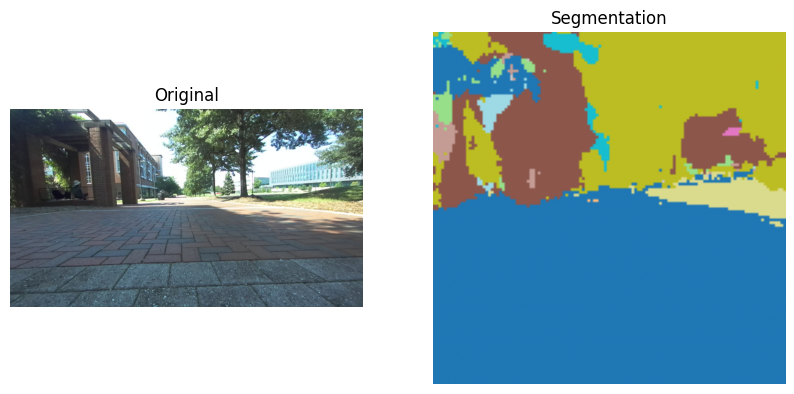

In [10]:
session = ort.InferenceSession(model_path)
image = Image.open(image_path).convert('RGB')
image_resized = image.resize((512, 512))

image_array = np.array(image_resized).astype(np.float32)

image_array = image_array.transpose(2, 0, 1)  # HWC to CHW
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Run model
outputs = session.run(None, {'pixel_values': image_array})
mask = np.argmax(outputs[0].squeeze(0), axis=0)

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='tab20')
plt.title('Segmentation')
plt.axis('off')

plt.show()